In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Information Retrieval/A3/email-Eu-core.txt',sep = ' ', header=None)

In [ ]:
df

,0,1
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [ ]:
edges_arr = np.array(df)

In [ ]:
edges_arr.shape

(25571, 2)

In [ ]:
adj_mat = np.zeros((1005,1005))

In [ ]:
adj_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for i in range(edges_arr.shape[0]):
  adj_mat[edges_arr[i][0],edges_arr[i][1]] += 1

In [ ]:
adj_mat[56,10]

0.0

In [ ]:
print('Number of nodes: ',np.unique(edges_arr).shape[0])
print('Number of edges: ',edges_arr.shape[0])
print('Average in-degree: ', 25571/1005)
print('Average out-degree: ', 25571/1005)
print('Node with max in-degree: ', np.argmax(np.sum(adj_mat,axis = 0)))
print('Node with max out-degree: ', np.argmax(np.sum(adj_mat,axis = 1)))
print('The density of the graph: ',  25571/(1005*1004))

Number of nodes:  1005
Number of edges:  25571
Average in-degree:  25.443781094527363
Average out-degree:  25.443781094527363
Node with max in-degree:  160
Node with max out-degree:  160
The density of the graph:  0.025342411448732432


Text(0.5, 1.0, 'In-Degree Distribution of the Network')

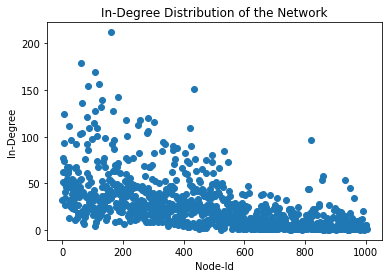

In [ ]:
plt.scatter([i for i in range(1005)],np.sum(adj_mat,axis = 0))
plt.xlabel('Node-Id')
plt.ylabel('In-Degree')
plt.title('In-Degree Distribution of the Network')

Text(0.5, 1.0, 'Out-Degree Distribution of the Network')

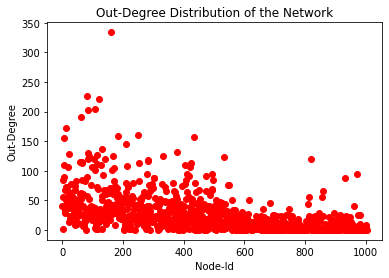

In [ ]:
plt.scatter([i for i in range(1005)],np.sum(adj_mat,axis = 1),c='red')
plt.xlabel('Node-Id')
plt.ylabel('Out-Degree')
plt.title('Out-Degree Distribution of the Network')

In [ ]:
# Local Clustering coefficient
lcc = []
for i in range(1005):
  #print("i=",i)
  row = adj_mat[i,:]
  #print(row)
  neigh = []
  
  for j in range(row.shape[0]):
    if adj_mat[i,j] == 1 or adj_mat[j,i] == 1:
      neigh.append(j)
  num = 0
  for k in range(len(neigh)):
    for l in range(k+1,len(neigh)):
      if adj_mat[neigh[l],neigh[k]] == 1:
        num += 1
      if adj_mat[neigh[k],neigh[l]] == 1:
        num += 1
  all_pos_edges = len(neigh) * (len(neigh) - 1)
  
  #print(num,',',all_pos_edges)
  if num > all_pos_edges:
    print(i)
    print(num,',',all_pos_edges)
    print(neigh)
  
  
  if(all_pos_edges == 0):
    lcc.append(0)
  else:
    lcc.append(num/all_pos_edges)


Text(0.5, 1.0, 'Local Clustering Coefficient(LCC)')

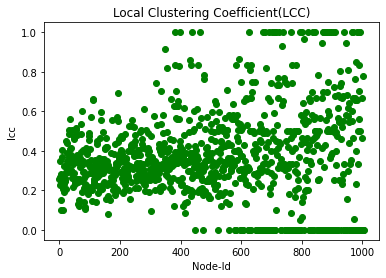

In [ ]:
plt.scatter([i for i in range(1005)],lcc,c='green')
plt.xlabel('Node-Id')
plt.ylabel('lcc')
plt.title('Local Clustering Coefficient(LCC)')

In [ ]:
count_nz = 0
for i in lcc:
  if i != 0:
    count_nz += 1
print(count_nz)

896


Text(0.5, 1.0, 'Clustering-Coefficient Distribution')

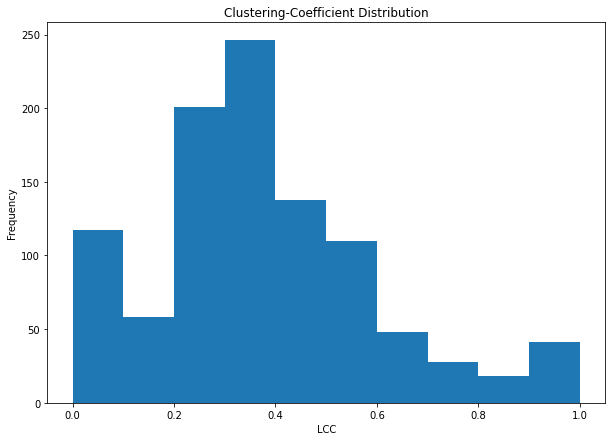

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(lcc, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel('LCC')
plt.ylabel('Frequency')
plt.title('Clustering-Coefficient Distribution')